In [1]:
import numpy as np

In [2]:
D=200
train_num=80 #学習データの数
test_num=20 #テストデータの数
sigma = 1/5 #ノイズの標準偏差
b = 2 * np.random.rand(D) -1
b = b / np.linalg.norm(b) # β |β|=1

In [3]:
train_X = np.random.randn(train_num, D)
test_X = np.random.randn(test_num,D)

In [4]:
train_X.shape, test_X.shape

((80, 200), (20, 200))

In [5]:
train_y = np.matmul(train_X, b.T) + np.random.normal(0, sigma, train_num)
test_y = np.matmul(test_X, b.T) + np.random.normal(0, sigma, test_num)

In [6]:
train_y.shape, test_y.shape

((80,), (20,))

In [7]:
def calc_reg(param_num):
    b_pred = np.linalg.lstsq(train_X[:,:param_num], train_y, rcond=None)[0]
    return b_pred

In [8]:
def calc_loss(X, y, param_num, b_pred):
    y_pred = np.matmul(X[:,:param_num], b_pred.T)
    loss = np.sum(np.abs(y - y_pred)*2)/ len(y)
    return loss

In [9]:
param_nums = []
train_losses = []
test_losses = []
for param_num in range(1,D+1):
    b_pred = calc_reg(param_num)
    train_loss = calc_loss(train_X, train_y, param_num, b_pred)
    test_loss = calc_loss(test_X, test_y, param_num, b_pred)
    param_nums.append(param_num)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

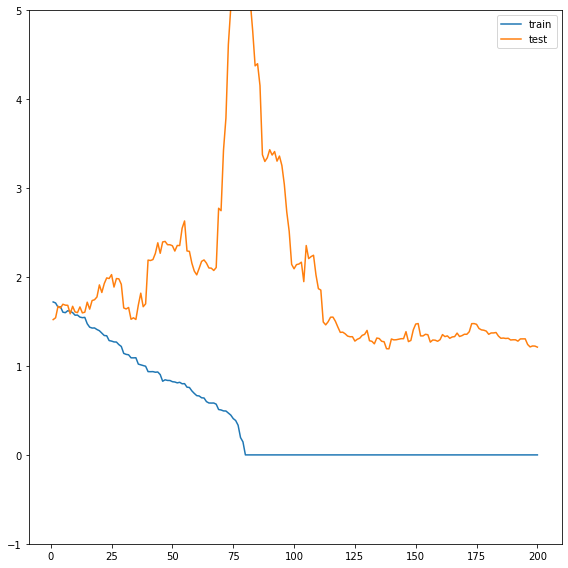

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(param_nums, train_losses, label="train")
ax.plot(param_nums, test_losses, label="test")
ax.legend(loc=0)
plt.ylim(-1,5)
fig.tight_layout()
plt.show()